## Demonstration of geometrical coregistration with ancillary refinement on real data

Run [prep_coreg_demo.ipynb](./prep_coreg_demo.ipynb) for data preparation.

In [1]:
%matplotlib inline
import os
import numpy as np
import datetime as dt
from scipy import interpolate
from osgeo import gdal
from matplotlib import pyplot as plt, patches
from mintpy.utils import readfile, utils as ut, plot as pp
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2022_Geolocation/figs_src/coreg')
os.chdir(work_dir)
print('Go to directory:', work_dir)

data_dir = os.path.expanduser('~/data/geolocation/HawaiiAlosDT598/')
ifg1_dir = os.path.join(data_dir, 'interferogram_v1')
ifg2_dir = os.path.join(data_dir, 'interferogram_v2')
xstep, ystep = 2, 2

Go to directory: /Users/yunjunz/Papers/2022_Geolocation/figs_src/coreg


### Read data

In [3]:
pha1 = readfile.read(os.path.join(ifg1_dir, 'topophase.flat'), datasetName='phase', xstep=xstep, ystep=ystep)[0]
pha2 = readfile.read(os.path.join(ifg2_dir, 'topophase.flat'), datasetName='phase', xstep=xstep, ystep=ystep)[0]
mli2 = readfile.read(os.path.join(ifg2_dir, 'mli_topophase.flat'), datasetName='phase', xstep=xstep, ystep=ystep)[0]

### Plot

save figure to file /Users/yunjunz/Papers/2022_Geolocation/figs_src/coreg/coreg_demo.png


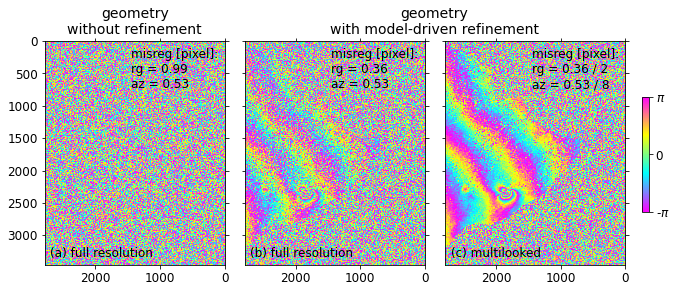

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[9, 4], sharex=True, sharey=True)
extent = (-0.5, pha1.shape[1]-0.5, int(pha1.shape[0]/4)-0.5, -0.5)
kwargs = dict(vmin=-np.pi, vmax=np.pi, cmap=pp.ColormapExt('cmy').colormap,  interpolation='nearest', extent=extent)
for ax, data in zip(axs, [pha1, pha2, mli2]):
    im = ax.imshow(data, **kwargs)

# axis format
for ax in axs:  ax.tick_params(which='both', direction='out', bottom=True, top=True, left=True, right=True)
#axs[0].set_title('geometry\nw/o refinement')
#axs[1].set_title('geometry\nw/ model-driven refinement', loc='right')
axs[0].invert_xaxis()
fig.tight_layout()

# colorbars
cax = fig.add_axes([1.0, 0.3, 0.01, 0.4])
cbar = plt.colorbar(im, cax=cax, orientation='vertical', ticks=[-np.pi, 0, np.pi])
cbar.ax.set_yticklabels([r'-$\pi$', '0', r'$\pi$'])

# labels
axs[0].annotate('geometry\nwithout refinement',           xy=(0.50, 1.03), xycoords='axes fraction', ha='center', fontsize=14)
axs[1].annotate('geometry\nwith model-driven refinement', xy=(1.05, 1.03), xycoords='axes fraction', ha='center', fontsize=14)
for i, label in enumerate(['(a) full resolution', '(b) full resolution', '(c) multilooked']):
    axs.flatten()[i].annotate(label, xy=(0.03, 0.035), xycoords='axes fraction', ha='left')
axs[0].annotate('misreg [pixel]:\nrg = 0.99\naz = 0.53',         xy=(0.48, 0.79), xycoords='axes fraction')
axs[1].annotate('misreg [pixel]:\nrg = 0.36\naz = 0.53',         xy=(0.48, 0.79), xycoords='axes fraction')
axs[2].annotate('misreg [pixel]:\nrg = 0.36 / 2\naz = 0.53 / 8', xy=(0.48, 0.79), xycoords='axes fraction')

# output
out_fig = os.path.join(work_dir, 'coreg_demo.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

### Backup: previous verion

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/coreg/coreg_demo.png


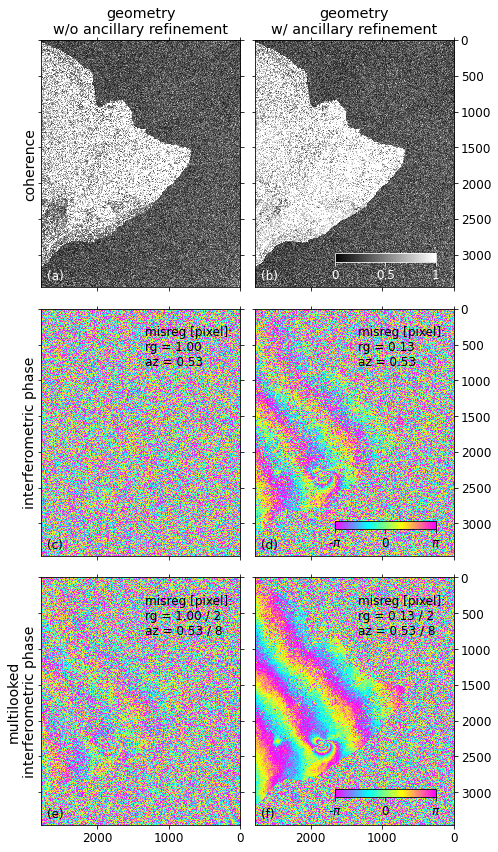

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=[7, 12], sharex=True, sharey=True)
extent = (-0.5, pha1.shape[1]-0.5, int(pha1.shape[0]/4)-0.5, -0.5)
kwargs1 = dict(vmin=0,      vmax=1,     cmap=pp.ColormapExt('gray').colormap, interpolation='nearest', extent=extent)
kwargs2 = dict(vmin=-np.pi, vmax=np.pi, cmap=pp.ColormapExt('cmy').colormap,  interpolation='nearest', extent=extent)
im1 = axs[0,0].imshow(cor1, **kwargs1)
im1 = axs[0,1].imshow(cor2, **kwargs1)
im2 = axs[1,0].imshow(pha1, **kwargs2)
im2 = axs[1,1].imshow(pha2, **kwargs2)
im3 = axs[2,0].imshow(mli1, **kwargs2)
im3 = axs[2,1].imshow(mli2, **kwargs2)

# axis format
for ax in axs.flatten():
    ax.tick_params(which='both', direction='out', bottom=True, top=True, left=True, right=True)
axs[0,0].invert_xaxis()
for ax in axs[:,0]:       ax.tick_params(labelleft=False)
for ax in axs[:,1]:       ax.tick_params(labelright=True)
axs[0,0].set_title('geometry\nw/o ancillary refinement')
axs[0,1].set_title('geometry\nw/ ancillary refinement')
axs[0,0].set_ylabel('coherence', fontsize=14)
axs[1,0].set_ylabel('interferometric phase', fontsize=14)
axs[2,0].set_ylabel('multilooked\ninterferometric phase', fontsize=14)
fig.tight_layout()

# colorbars
caxs = [fig.add_axes([0.67, 0.69, 0.2, 0.01]),
        fig.add_axes([0.67, 0.38, 0.2, 0.01]),
        fig.add_axes([0.67, 0.07, 0.2, 0.01])]
cs = ['w', 'k', 'k']
ticks = [[0,0.5,1], [-np.pi, 0, np.pi], [-np.pi, 0, np.pi]]
ticklabels = [['0', '0.5', '1'], [r'-$\pi$', '0', r'$\pi$'], [r'-$\pi$', '0', r'$\pi$']]
for i, (cax, im, ticks, ticklabels) in enumerate(zip(caxs, [im1, im2, im3], ticks, ticklabels)):
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=ticks)
    cbar.ax.set_xticklabels(ticklabels, color=cs[i])
    cbar.outline.set_edgecolor(cs[i])
    cax.tick_params(axis='both', colors=cs[i])

# labels
for i, (label, c) in enumerate(zip(['(a)', '(b)', '(c)', '(d)', '(e)', '(f)'], ['w', 'w', 'k', 'k', 'k', 'k'])):
    axs.flatten()[i].annotate(label, color=c, xy=(0.03, 0.03), xycoords='axes fraction', ha='left')
axs[1,0].annotate('misreg [pixel]:\nrg = 1.00\naz = 0.53', xy=(0.52, 0.77), xycoords='axes fraction')
axs[1,1].annotate('misreg [pixel]:\nrg = 0.13\naz = 0.53', xy=(0.52, 0.77), xycoords='axes fraction')
axs[2,0].annotate('misreg [pixel]:\nrg = 1.00 / 2\naz = 0.53 / 8', xy=(0.52, 0.77), xycoords='axes fraction')
axs[2,1].annotate('misreg [pixel]:\nrg = 0.13 / 2\naz = 0.53 / 8', xy=(0.52, 0.77), xycoords='axes fraction')

# output
out_fig = os.path.join(work_dir, 'coreg_demo.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()